<a href="https://colab.research.google.com/github/Abinayak03/Machine_learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
The dataset comprises the following columns:

- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).
  
I used this dataset to build and evaluate machine learning models to predict the weather type based on the given parameters and performed data preprocessing, exploratory data analysis, and model training using Support Vector Machine (SVM) with different kernels.

Dataset credits: Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

**Import Necessary Libraries**

In [23]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###  Data Preparation and Exploration



In [24]:
# Step 1: Import the data from the "weather_data.csv" file
df=pd.read_csv('weather_classification_data.csv')

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to understand its structure.
df.head(5)

(13200, 11)


,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


weather_type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


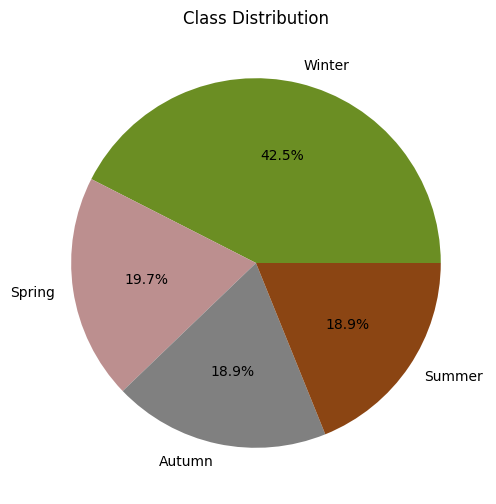

In [4]:
# Step 4: Visualize the distribution of key features
print(df['weather_type'].value_counts())
# Visualize season using a pie chart
weather=df['season'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(weather, labels=weather.index, autopct='%1.1f%%',colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown'])
plt.title('Class Distribution')
plt.show()

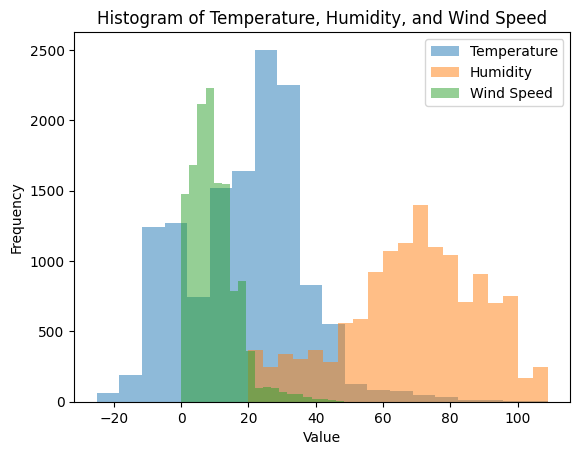

In [5]:
# Visualize temperature, humidity, and wind_speed using histograms
plt.hist(df['temperature'], bins=20, alpha=0.5, label='Temperature')
plt.hist(df['humidity'], bins=20, alpha=0.5, label='Humidity')
plt.hist(df['wind_speed'], bins=20, alpha=0.5, label='Wind Speed')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature, Humidity, and Wind Speed')
plt.legend()
plt.show()


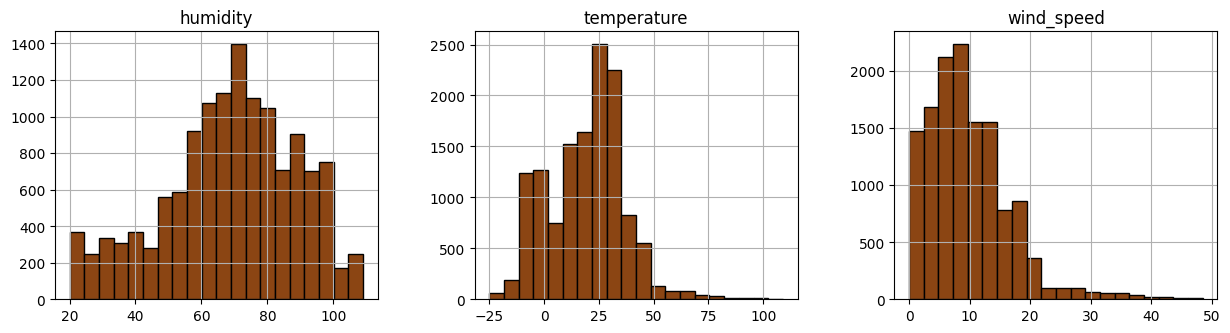

In [6]:
df[['humidity','temperature','wind_speed']].hist(figsize=(15,8),bins=20,color='saddlebrown',layout=(2,3), edgecolor='black', linewidth=1)
plt.show()

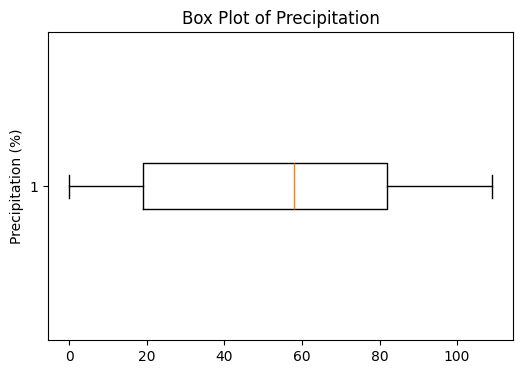

In [7]:
# Visualize precipitation (%) using a box plot
plt.figure(figsize=(6, 4))
plt.boxplot(df['precipitation (%)'],vert=False)
plt.ylabel('Precipitation (%)')
plt.title('Box Plot of Precipitation')
plt.show()

###Data Transformation


In [25]:
# Step 1: Encode cloud_cover, location and season using one-hot encoding.
df=pd.get_dummies(df,columns=['cloud_cover','location','season'],drop_first=True)


In [26]:
# Step 2: Scale the numerical features
scale=StandardScaler()
features=['temperature', 'humidity', 'wind_speed', 'precipitation (%)',
       'atmospheric_pressure', 'uv_index', 'visibility (km)']
df[features]=scale.fit_transform(df[features])


In [27]:
# Step3: Display the first few rows of the updated dataset.
df.head(5)


,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,Rainy,False,False,True,True,False,False,False,True
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,Cloudy,False,False,True,True,False,True,False,False
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,Sunny,False,False,False,False,True,True,False,False
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,Sunny,False,False,False,False,False,True,False,False
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,Rainy,False,True,False,False,True,False,False,True


### Model Training Using SVM with Linear Kernel


In [28]:
# Step 1: Select features and target variable
X=df.drop('weather_type',axis=1)
y=df['weather_type']

# Step 2: Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
# Step 3: Train SVM with linear kernel
model=SVC(kernel='linear')
model.fit(X_train,y_train)

# Step 4: Print accuracy score
print("accuracy: ",model.score(X_test,y_test))


accuracy:  0.8845959595959596


In [14]:
# Step 5: Evaluate the model
y_pred=model.predict(X_test)


#classification report
report=classification_report(y_test,y_pred)
print(report)


#confusion matrix
c_m=confusion_matrix(y_test,y_pred)
print(c_m)


              precision    recall  f1-score   support

      Cloudy       0.86      0.84      0.85       955
       Rainy       0.87      0.87      0.87       982
       Snowy       0.88      0.94      0.91      1033
       Sunny       0.92      0.88      0.90       990

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960

[[806  82  28  39]
 [ 49 852  67  14]
 [ 26  12 974  21]
 [ 57  29  33 871]]


**Visualising confusion matrix using heatmap**

In [15]:
classes=df['weather_type'].unique()
classes

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

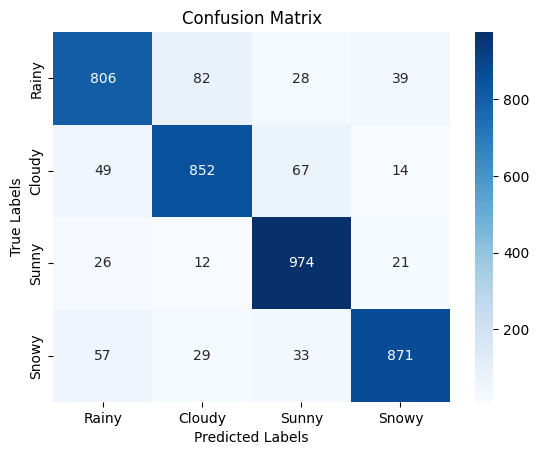

In [16]:
sns.heatmap(c_m,annot=True,fmt='d',cmap='Blues',xticklabels=classes,yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Model Training Using SVM with RBF Kernel


In [17]:
# Step 1: Train SVM with RBF kernel
model_rbf=SVC(kernel='rbf')
model_rbf.fit(X_train,y_train)


# Step 2: Print accuracy score
print("accuracy",model_rbf.score(X_test,y_test))



# Step 3: Evaluate the model
y_pred_rbf=model_rbf.predict(X_test)
#classification report
report_rbf=classification_report(y_test,y_pred_rbf)
print(report_rbf)


#confusion matrix
matrix=confusion_matrix(y_test,y_pred_rbf)
print(matrix)


accuracy 0.9055555555555556
              precision    recall  f1-score   support

      Cloudy       0.86      0.88      0.87       955
       Rainy       0.89      0.91      0.90       982
       Snowy       0.94      0.94      0.94      1033
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

[[843  64  24  24]
 [ 54 891  13  24]
 [ 30  14 968  21]
 [ 48  28  30 884]]


**Visualising confusion matrix using heatmap**

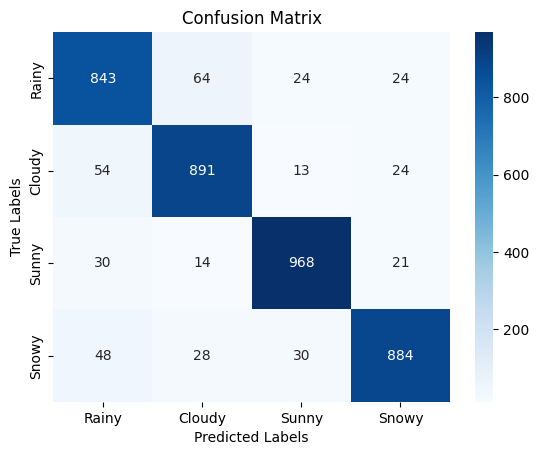

In [18]:
sns.heatmap(matrix,annot=True,fmt='d',cmap='Blues',xticklabels=classes,yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Experiment with Hyperparameters in SVM

Trained an SVM model with an RBF kernel and the following hyperparameters:
    - C=0.5
    - gamma='auto'
    - kernel='rbf'
    - degree=2
      
[SVC Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)


In [21]:
# Step 1: Train the SVM model with specified hyperparameters
model_svm=SVC(C=0.5,gamma='auto',kernel='rbf',degree=2)
model_svm.fit(X_train,y_train)

# Step 2: Print the model's accuracy score
accuracy=model_svm.score(X_test,y_test)
print("accuracy",accuracy)


# Step 3: Make predictions on the test set
y_pred_svm=model_svm.predict(X_test)


# Step 4: Evaluate the model using a classification report and confusion matrix
report_svm=classification_report(y_test,y_pred_svm)



#confusion matrix
matrix_svm=confusion_matrix(y_test,y_pred_svm)


#classification report
print(report_svm)


#confusion matrix
print(matrix_svm)


accuracy 0.898989898989899
              precision    recall  f1-score   support

      Cloudy       0.87      0.87      0.87       955
       Rainy       0.90      0.90      0.90       982
       Snowy       0.90      0.94      0.92      1033
       Sunny       0.93      0.88      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

[[833  62  36  24]
 [ 50 882  31  19]
 [ 29  10 973  21]
 [ 46  30  42 872]]


### Implementing Sklearn Pipeline


In [31]:
# Create a pipeline with two steps: scaling and SVM with RBF kernel
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('scale',StandardScaler()),('svm',SVC(kernel='rbf'))])



# Fit the pipeline on the training data
pipeline.fit(X_train,y_train)

# Make predictions using the pipeline on the test data
predict=pipeline.predict(X_test)

# Print the classification report for the pipeline model
report=classification_report(y_test,predict)
print(report_svm)

# Print the confusion matrix for the pipeline model
cm=confusion_matrix(y_test,predict)
print(cm)

              precision    recall  f1-score   support

      Cloudy       0.87      0.87      0.87       955
       Rainy       0.90      0.90      0.90       982
       Snowy       0.90      0.94      0.92      1033
       Sunny       0.93      0.88      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

[[836  64  29  26]
 [ 47 892  22  21]
 [ 30  16 971  16]
 [ 52  27  29 882]]


**Visualising confusion matrix using heatmap**

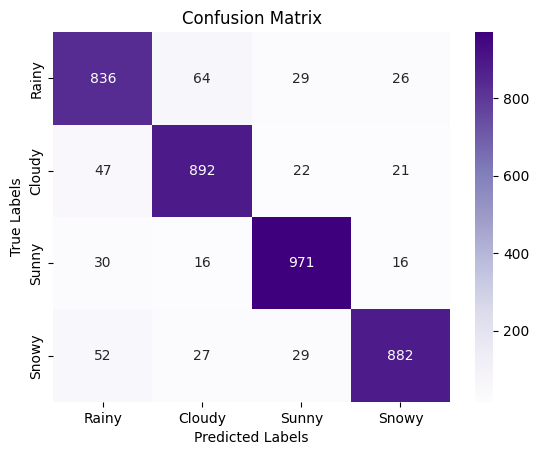

In [40]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Purples',xticklabels=classes,yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()